In [1]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
white = pd.read_csv('winequality-white.csv', sep=';')
red = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [6]:
red.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [7]:
combine = [red,white]
for dataset in combine:
    dataset['quality_label']  = dataset.quality.apply(lambda x: ('medium' if 5 < x <= 7 else 'low') if x<=7 else 'high')
    dataset['quality_label'] = pd.Categorical(dataset['quality_label'], categories = ['low', 'medium', 'high'])

In [8]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [9]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   int64   
 12  quality_label         1599 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 151.7 KB


In [10]:
red.quality_label.value_counts()

medium    837
low       744
high       18
Name: quality_label, dtype: int64

In [11]:
red['wine_type'] = 'red'
white['wine_type'] = 'white'
wines = pd.concat([red, white], axis = 0)
wines.shape

(6497, 14)

In [12]:
#Resetting 
wines = wines.sample(frac = 1.0, random_state = 42).reset_index(drop = True)

In [13]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,high,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,low,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium,white
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,medium,white
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,medium,white


In [14]:
#Descriptive Statistics based on subsets of data/attributes
subset_attributes = ['residual sugar',        #1
                     'total sulfur dioxide',  #2
                     'sulphates',             #3
                     'alcohol',               #4
                     'volatile acidity',      #5
                     'quality']     
rdesc = round(red[subset_attributes].describe(), 2)
wdesc = round(white[subset_attributes].describe(), 2)
pd.concat([rdesc, wdesc], axis = 1, keys=['🔴 Red Wine Statistics', 
                '⚪️ White Wine Statistics' ])

🔴 Red Wine Statistics                                          \
             residual sugar total sulfur dioxide sulphates  alcohol   
count               1599.00              1599.00   1599.00  1599.00   
mean                   2.54                46.47      0.66    10.42   
std                    1.41                32.90      0.17     1.07   
min                    0.90                 6.00      0.33     8.40   
25%                    1.90                22.00      0.55     9.50   
50%                    2.20                38.00      0.62    10.20   
75%                    2.60                62.00      0.73    11.10   
max                   15.50               289.00      2.00    14.90   

                                ⚪️ White Wine Statistics                       \
      volatile acidity  quality           residual sugar total sulfur dioxide   
count          1599.00  1599.00                  4898.00              4898.00   
mean              0.53     5.64                     6.39               138.36   
std               0.18     0.81                     5.07                42.50   
min               0.12     3.00                     0.60                 9.00   
25%               0.39     5.00                     1.70               108.00   
50%               0.52     6.00                     5.20               134.00   
75%               0.64     6.00                     9.90               167.00   
max               1.58     8.00                    65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [15]:
subset_attributes = ['alcohol', 'volatile acidity', 'pH', 'quality']
ls = wines[subset_attributes][wines['quality_label'] == 'low'].describe()
ms = wines[subset_attributes][wines['quality_label'] == 'medium'].describe()
hs = wines[subset_attributes][wines['quality_label'] == 'high'].describe()
pd.concat([ls,ms,hs], axis = 1, keys = ['low quality', 'medium quality' ,'high quality'])

low quality                                            medium quality  \
           alcohol volatile acidity           pH      quality        alcohol   
count  2384.000000      2384.000000  2384.000000  2384.000000    3915.000000   
mean      9.873544         0.397410     3.214522     4.884228      10.807612   
std       0.841746         0.187971     0.161311     0.357197       1.201098   
min       8.000000         0.100000     2.740000     3.000000       8.400000   
25%       9.300000         0.260000     3.110000     5.000000       9.800000   
50%       9.600000         0.337500     3.200000     5.000000      10.800000   
75%      10.400000         0.500000     3.310000     5.000000      11.700000   
max      14.900000         1.580000     3.900000     5.000000      14.200000   

                                                 high quality  \
      volatile acidity           pH      quality      alcohol   
count      3915.000000  3915.000000  3915.000000   198.000000   
mean          0.306955     3.220577     6.275607    11.691414   
std           0.139826     0.160674     0.446877     1.273262   
min           0.080000     2.720000     6.000000     8.500000   
25%           0.210000     3.110000     6.000000    11.000000   
50%           0.270000     3.210000     6.000000    12.000000   
75%           0.360000     3.330000     7.000000    12.600000   
max           1.040000     4.010000     7.000000    14.000000   

                                                
      volatile acidity          pH     quality  
count       198.000000  198.000000  198.000000  
mean          0.291187    3.225354    8.025253  
std           0.118123    0.156431    0.157289  
min           0.120000    2.880000    8.000000  
25%           0.210000    3.130000    8.000000  
50%           0.275000    3.230000    8.000000  
75%           0.350000    3.330000    8.000000  
max           0.850000    3.720000    9.000000

In [16]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  quality_label         6497 non-null   category
 13  wine_type             6497 non-null   object  
dtypes: category(1), float64(11), int64(1), object(1)
memory 

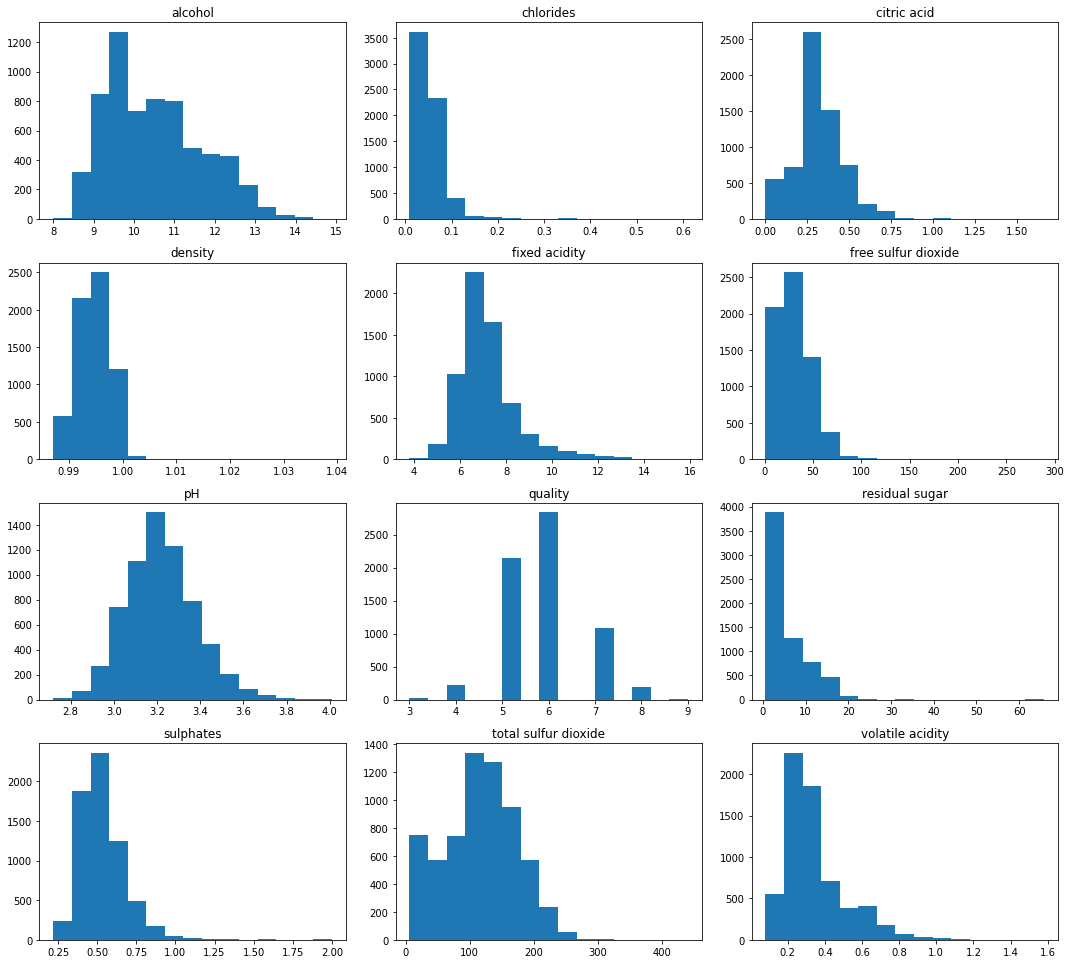

In [17]:
#Histogram Plot
grid = wines.hist(bins=15, figsize=(10,9), grid = False)
plt.tight_layout(rect=(0,0, 1.5, 1.5)) 

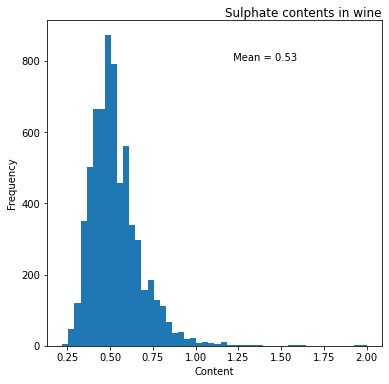

In [18]:
#or it can be done through add_subplot or subplot2grid
fig = plt.figure(figsize=(6, 6))

ax1 = fig.add_subplot(1,1,1)
# ax2 = fig.add_subplot(2,1,2)
ax1.set_title('Sulphate contents in wine', pad = 2, loc = 'right')
# ax2.set_title('Chloride contents in wine', pad = 1, loc = 'left')

ax1.set_xlabel('Content')
ax1.set_ylabel('Frequency')
# ax2.set_xlabel('Content')
# ax2.set_ylabel('Frequency')

ax1.text(x = 1.2, y = 800, s = f' Mean = {wines.sulphates.mean():.2f}' )
# ax2.text(x = 0.35, y = 2000, s = f' Mean = {wines.chlorides.mean():.2f}' )
ax1.hist(wines['sulphates'], bins = 50)
# ax2.hist(wines['chlorides'], bins = 50)
plt.show()

In [19]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,high,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,low,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium,white
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,medium,white
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,medium,white


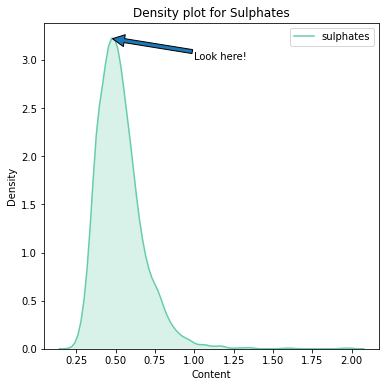

In [20]:
#Density Plot
fig = plt.figure(figsize=(6,6))

ax3 = fig.add_subplot(111)
ax3.set_title('Density plot for Sulphates')
ax3.set_xlabel('Content')
ax3.set_ylabel('Density')
# ax3.text(x = 1, y = 2, s = 'mean = blablabla')

#adding a arrow/annotation
ax3.annotate('Look here!', xy = (0.48,3.22), xytext = (1,3), arrowprops = {} )
sns.kdeplot(wines['sulphates'], ax = ax3, shade = True, color='mediumaquamarine')

<ipython-input-21-2a3c6eab41a0>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(111)


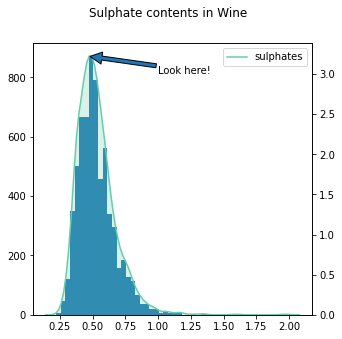

In [21]:
#Histogram and density plot combines
fig = plt.figure(figsize = (5,5))
title = fig.suptitle('Sulphate contents in Wine')

ax1 = fig.add_subplot(111)
freq, bins, patches = ax1.hist(wines['sulphates'], bins = 50)

ax2 = fig.add_subplot(111)
ax2 = ax1.twinx() #To merge two plots/Histograms and KDE can be combined using sns.distplot
sns.kdeplot(wines['sulphates'], ax = ax2, shade = True, color = 'mediumaquamarine')
ax2.annotate('Look here!', xy = (0.48,3.22), xytext = (1,3), arrowprops = {} )

plt.show()

In [22]:
val = wines['quality'].value_counts()
val_idx = val.index
print(val,val_idx)

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64 Int64Index([6, 5, 7, 4, 8, 3, 9], dtype='int64')


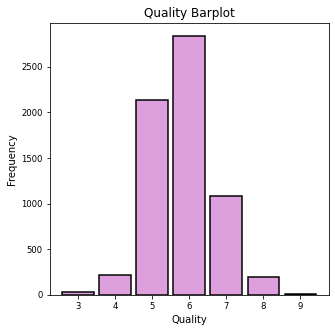

In [23]:
#Barplot
fig = plt.figure(figsize = (5,5))
ax4 = fig.add_subplot(111)

ax4.set_xlabel('Quality')
ax4.set_ylabel('Frequency')
ax4.set_title('Quality Barplot')

ax4.tick_params(axis='both', which='major', labelsize=8.5)

bar = ax4.bar(val_idx, val, width = 0.85, edgecolor = 'black', color = 'plum', linewidth = 1.5)

In [24]:
#Tutorial 2d plotting by jovianlin.io
corr = wines.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


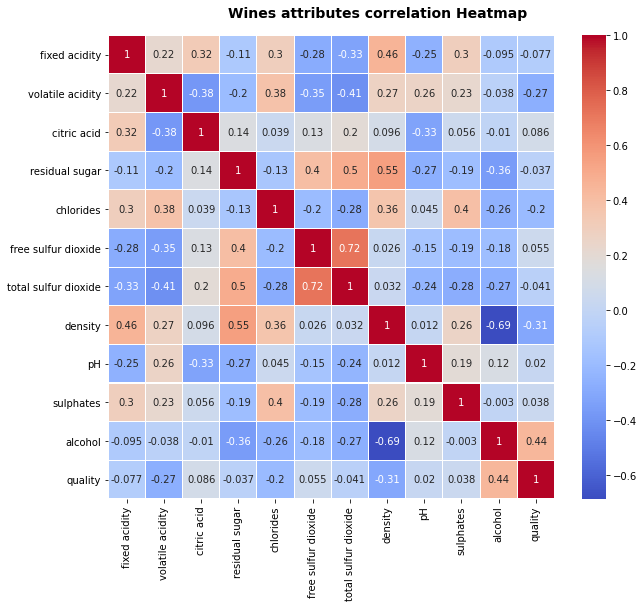

In [25]:
#correlation heatmap
fig , (ax1) = plt.subplots(1,1,figsize= (10,8) )

hm = sns.heatmap(corr, ax = ax1,
                 annot= True,
#                  square = True,
                 cmap='coolwarm',
                 linewidths = 0.08)
fig.subplots_adjust(top = .93)

fig.suptitle('Wines attributes correlation Heatmap', fontsize= 14, fontweight='bold')
plt.show()

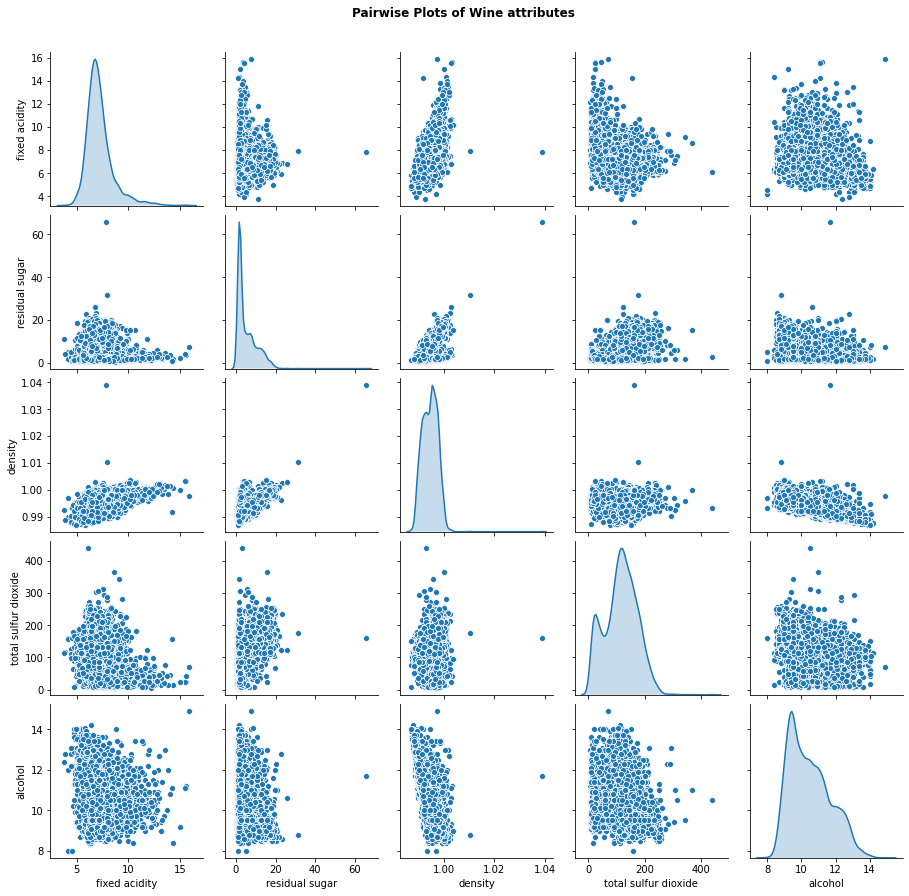

In [26]:
#PairWise/ scatter plots for observing potential relationships in data
cols = ['fixed acidity', 'residual sugar', 'density', 'total sulfur dioxide', 'alcohol']
pp = sns.pairplot(wines[cols], diag_kind='kde')

fig = pp.fig
fig.subplots_adjust(top=0.93)
fig.suptitle('Pairwise Plots of Wine attributes', fontweight='bold')
plt.show()

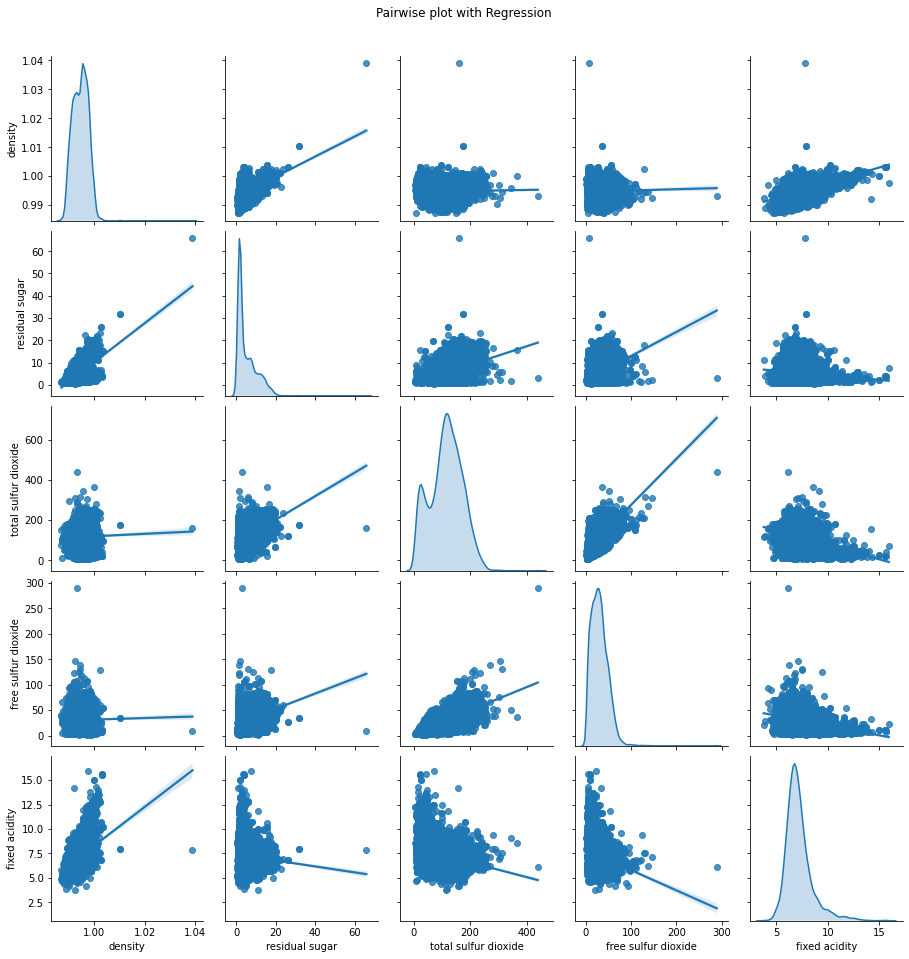

In [100]:
#we can also use regression for pairplots for eg:
pp = sns.pairplot(wines[cols], diag_kind='kde', kind='reg')
fig = pp.fig
fig.suptitle('Pairwise plot with Regression', x = 0.5, y = 1.05)
plt.show()

In [28]:
#Visualisation using parallel_coordinates for comparative study of 2 types

#before that normalized data is required
from sklearn.preprocessing import StandardScaler
cols = ['density', 
        'residual sugar', 
        'total sulfur dioxide', 
        'free sulfur dioxide', 
        'fixed acidity']

tempdf = wines[cols]

tempdf = pd.DataFrame(StandardScaler().fit_transform(tempdf), columns=cols)
final_df = pd.concat([tempdf, wines['wine_type']], axis= 1)
final_df.head()

,density,residual sugar,total sulfur dioxide,free sulfur dioxide,fixed acidity,wine_type
0,-0.165631,1.546371,0.181456,-0.367664,-0.166089,white
1,0.301278,-0.681719,0.305311,0.083090,0.373895,red
2,-0.859324,0.411306,0.305311,0.421155,-0.320370,white
3,0.408001,1.210056,1.189993,1.717074,-0.706073,white
4,1.395180,1.777588,2.003900,1.829762,0.142473,white


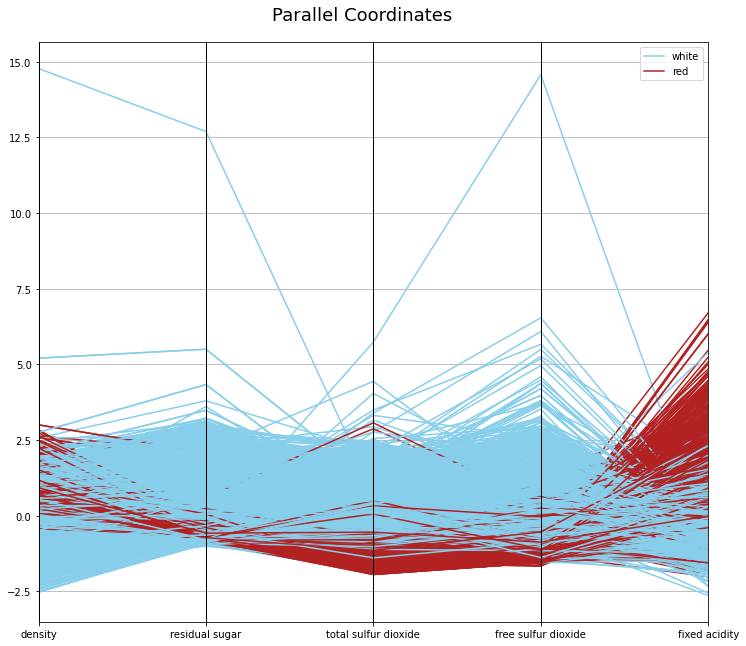

In [29]:
#now using parellel_coordinates
from pandas.plotting import parallel_coordinates

fig = plt.figure(figsize= (12,10))
title = fig.suptitle('Parallel Coordinates', fontsize = 18)
fig.subplots_adjust(top=0.93, wspace = 0)
pc = parallel_coordinates(final_df, 'wine_type', color=('skyblue', 'firebrick'))

# Each vertical line represents one data attribute (e.g. residual sugar).
# One complete set of connected line segments across all the attributes represents one data point.
# Hence points that tend to cluster will appear closer together.

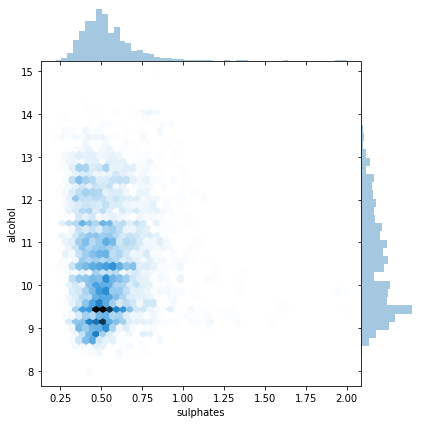

In [101]:
#Visualizing two continous numeric attributes
#Using sns.jointplot
#plt.scatter is replaced by sns.jointplot, use it untill matplotlib libraries are being upgraded

jp = sns.jointplot(x = wines['sulphates'],
                   y=wines['alcohol'],
#                   kind='reg', #Regression plot
#                   kind='kde', #Kernel Density Plot
                   kind='hex', #Histogram
                   space=0, height=6, ratio=6
                  )

In [31]:
wines['quality'].value_counts().to_dict()

{6: 2836, 5: 2138, 7: 1079, 4: 216, 8: 193, 3: 30, 9: 5}

/home/unknown/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


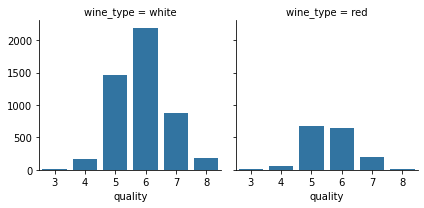

In [32]:
#Two discrete categorical attributes
#using sns.facets or Subplots
#1) using sns.FacetGrid

grid = sns.FacetGrid(wines, col='wine_type')
grid.map(sns.countplot, 'quality' )
plt.show()

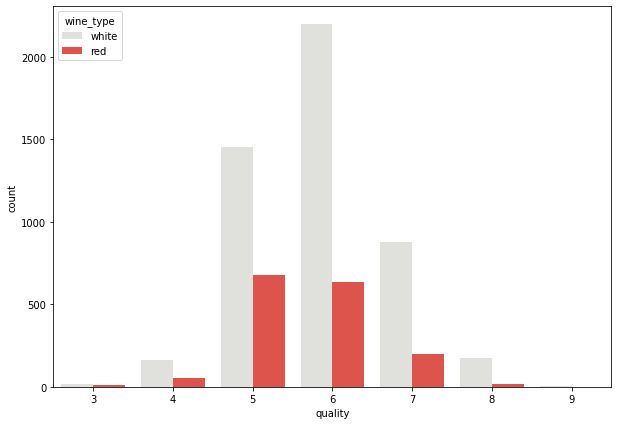

In [33]:
#or simply we can use sns.countplot
fig = plt.figure(figsize=(10,7))

cp = sns.countplot(data = wines, x='quality',hue='wine_type', palette={"red":"#f53f34", "white":"#e1e1dc"})

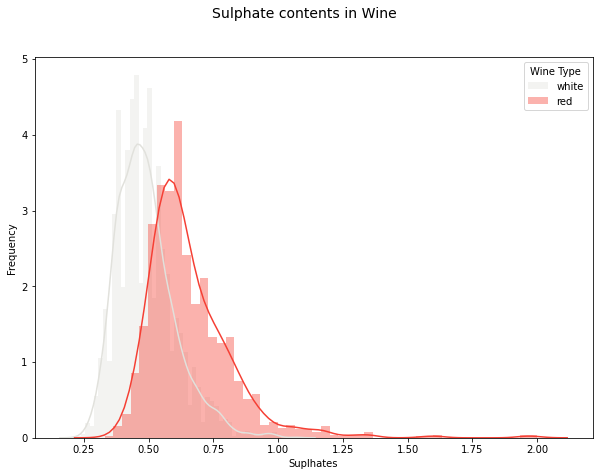

In [34]:
#visualizing mixed attributes (categorical + numeric)
fig, (ax) = plt.subplots(1, 1, figsize = (10,7))

fig.suptitle('Sulphate contents in Wine', fontsize = 14)
grid = sns.FacetGrid(wines, hue='wine_type', palette={"red":"#f53f34", "white":"#e1e1dc"})
grid.map( sns.distplot, 'sulphates', ax=ax )
ax.set_xlabel('Suplhates')
ax.set_ylabel('Frequency')
ax.legend(title = 'Wine Type')
plt.close(2)

Text(0, 0.5, 'Sulphate Density')

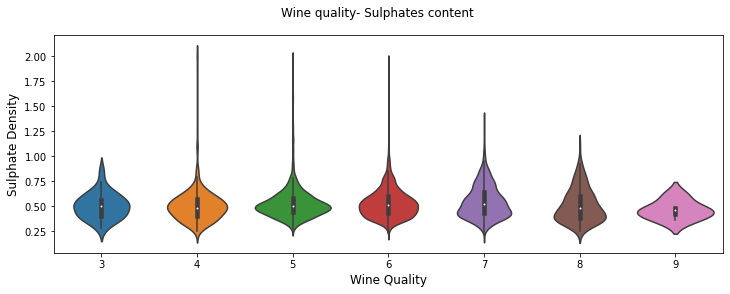

In [35]:
#Voilin Plots are useful in visualising probability density of data at different categorical values
fig, (ax) = plt.subplots(1, 1, figsize = (12,4))

fig.suptitle('Wine quality- Sulphates content')

sns.violinplot(data = wines, x='quality', y='sulphates')
ax.set_xlabel('Wine Quality', size= 12)
ax.set_ylabel('Sulphate Density', size = 12)

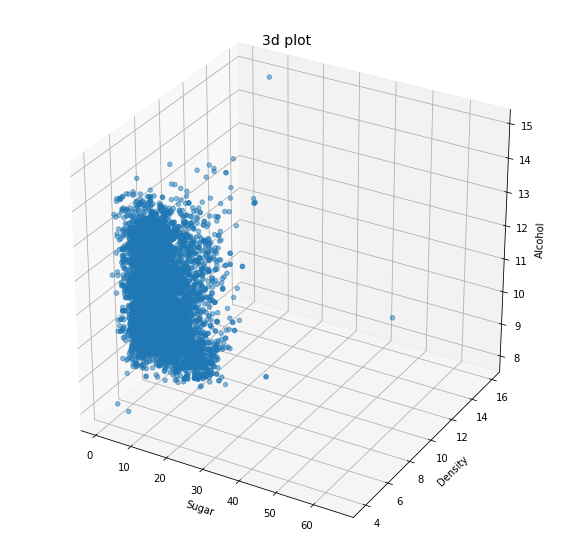

In [65]:
#TOTRIAL 3 for 3D plots
#3 continous numeric attributes
#using matplotlib.pyplot.scatter

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.set_title('3d plot', fontsize = 14)
ax.set_xlabel('Sugar')
ax.set_ylabel('Density')
ax.set_zlabel('Alcohol')

ax.scatter(wines['residual sugar'], wines['fixed acidity'], wines['alcohol'], s =20, alpha = 0.5)
plt.show()

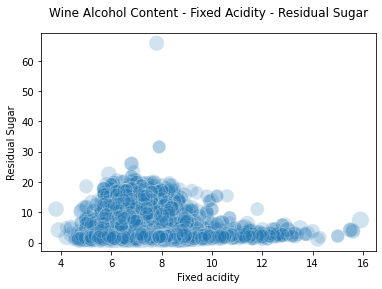

In [68]:
#or use the 's' parameter and visualize in 2D just by using variable marker size

plt.scatter( wines['fixed acidity'],
            wines['residual sugar'],
            s = wines['alcohol'] * 20, #Variable marker size
            alpha = 0.2,
            edgecolors = 'w')
plt.xlabel('Fixed acidity')
plt.ylabel('Residual Sugar')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar', y=1.05)
plt.show()

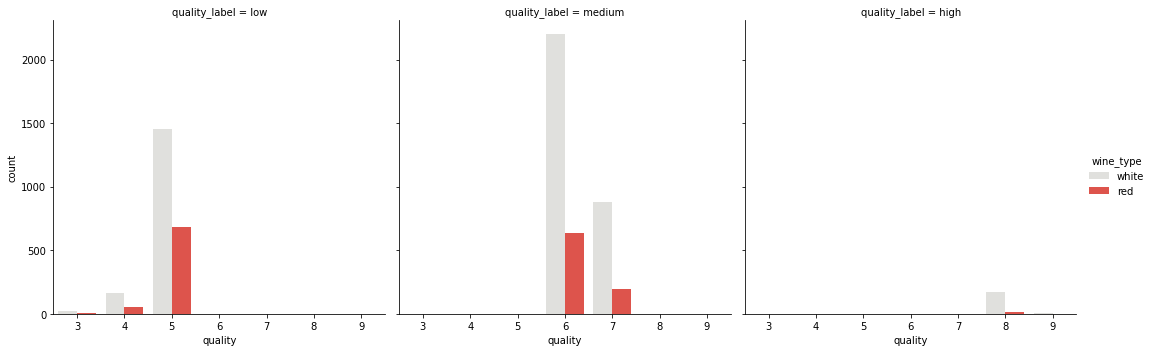

In [77]:
#For discrete categorical values we have factorplot
sns.factorplot(data  = wines,
               x = 'quality',
               hue='wine_type',
               col='quality_label',
               kind='count',
               palette={"red":"#f53f34", "white":"#e1e1dc"}   )

/home/unknown/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


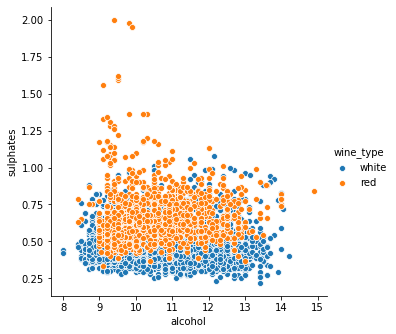

In [82]:
#pairplot for mixed types

sns.pairplot(data = wines,
             x_vars='alcohol',
             y_vars='sulphates',
             size = 4.5,
             hue='wine_type')

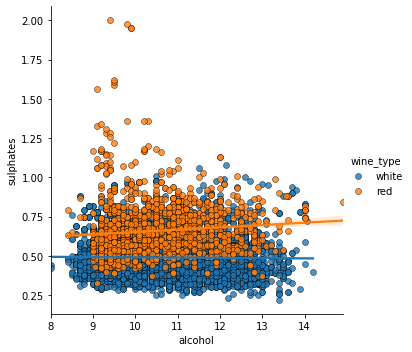

In [89]:
#its alternative lmplot can also display regression lines
sns.lmplot(data = wines,
           x = 'alcohol',
           y = 'sulphates',
           hue = 'wine_type',
           legend = True,
           scatter_kws=dict(edgecolor="k", linewidth=0.5)
          )

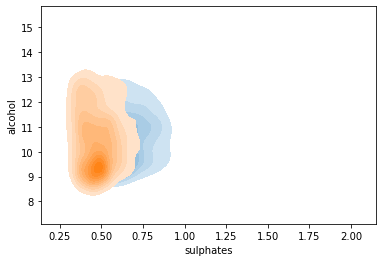

In [108]:
#or for the same purpose KDE can be used in mixed type

ax = sns.kdeplot(wines['sulphates'][wines['wine_type']=='red'],
                 wines['alcohol'][wines['wine_type']=='red'],
                 shade = True,
                shade_lowest=False  #Important parameter for here
                )
ax = sns.kdeplot(wines['sulphates'][wines['wine_type']=='white'],
                 wines['alcohol'][wines['wine_type']=='white'],
                 shade = True,
                shade_lowest= False)


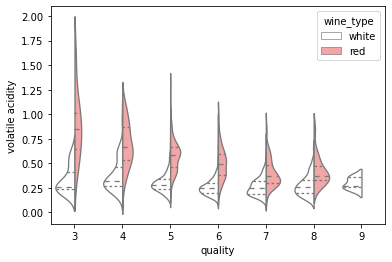

In [119]:
#similariy voilin plot can be splitted for categorical values on 3rd axis
sns.violinplot(data=wines,
               x="quality", 
               y="volatile acidity", 
               hue="wine_type",
               split=True,      
               palette={"red": "#FF9999",  
                        "white": "white"},
               inner="quart", linewidth=1.3,
               )
#and same applies for sns.boxplot but simply without 'split' paramter
plt.show()

Text(0.5, 1.05, 'Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type')

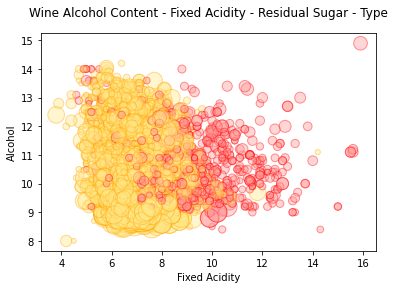

In [120]:
#For 3 or more dimensions we can use pointplot for categorical values but for numeric or mixed types we need to use tricks
#Visualizing 4 dimensions
# Factors:
# X-axis
# Y-axis
# Size
# Color

size = wines['residual sugar']*25
fill_colors = ['#FF9999' if wt=='red' else '#FFE888' for wt in list(wines['wine_type'])]
edge_colors = ['red' if wt=='red' else 'orange' for wt in list(wines['wine_type'])]

plt.scatter(wines['fixed acidity'], # <== 1st DIMENSION
            wines['alcohol'],       # <== 2nd DIMENSION
            s=size,                 # <== 3rd DIMENSION
            color=fill_colors,      # <== 4th DIMENSION             
            edgecolors=edge_colors,
            alpha=0.4)

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type',y=1.05)


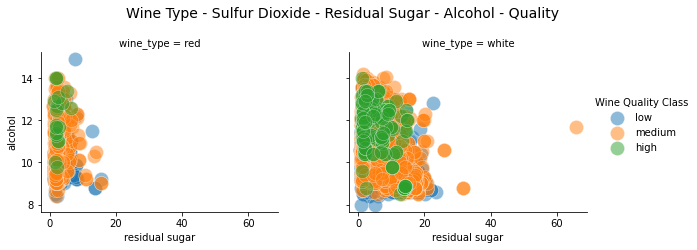

In [139]:
#5 dimensions
# Factors:
# X-axis
# Y-axis
# Color
# n-Columns
# Size  UNfortunately the s parameter creating issues currently.

g = sns.FacetGrid(wines, 
                  col="wine_type",            # TWO COLUMNS coz there're TWO "wine types"
                  col_order=['red', 'white'], # -> Specify the labels
                  hue='quality_label',        # ADD COLOR
                  hue_order=['low', 'medium', 'high'],
                  aspect=1.2, 
                  size=3.5)

g.map(plt.scatter, 
      "residual sugar", # <== x-axis
      "alcohol",        # <== y-axis
      alpha=0.5, 
      edgecolor='white', 
      linewidth=0.5, 
#       s=wines['total sulfur dioxide']*2
      s=200) # <==  Adjust the size

fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality', fontsize=14)
g.add_legend(title='Wine Quality Class')
plt.show()

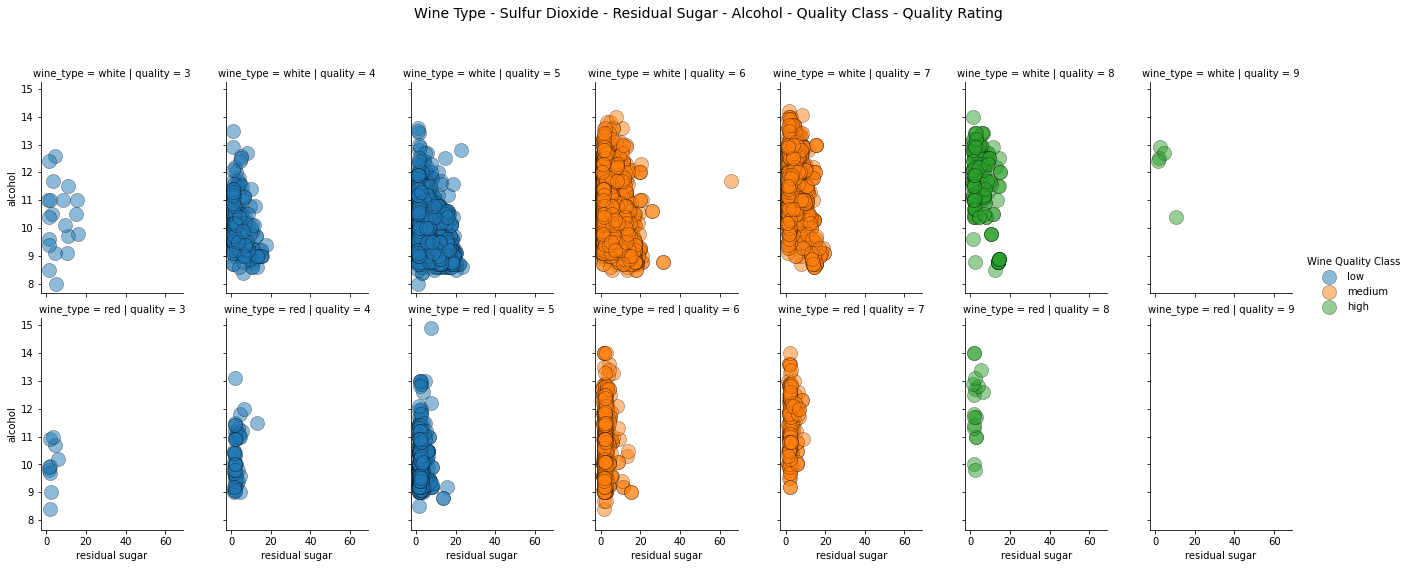

In [138]:
# visualizing 6 dimensions

# Factors:
# X-axis
# Y-axis
# Color
# n-Columns
# Size
# m-Rows

g = sns.FacetGrid(wines, 
                  row='wine_type',     # <== 1) 😀 ROW
                  col="quality",       # <== 2) 😀 COLUMN
                  hue='quality_label', # <== 3) 😀 COLOR
                  size=4)

g.map(plt.scatter,  
      "residual sugar", # <== 4) 😀 x-axis
      "alcohol",        # <== 5) 😀 y-axis
      alpha=0.5, 
      edgecolor='k', 
      linewidth=0.5, 
#       s=wines['total sulfur dioxide']*5 # <== 6) 😀 Size
      s=200 
     ) 

fig = g.fig 
fig.set_size_inches(18, 8)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality Class - Quality Rating', fontsize=14)
g.add_legend(title='Wine Quality Class')
plt.show()

# Credits to jovianlin.io for the guide

![SegmentLocal](furious-typing-cat.gif "segment")